# Proyecto I : Regresión Lineal 

Integrantes:
- Aldair Bernal Betancur
- Juan José Vera Arango


En este laboratorio vamos a analizar dos tipos de señales. GSR que es una señal tomada la cual representa la respuesta galvanica de la piel medida en microvoltios durante 1 segundo y otra señal llamada HR la cual representa el Pulso Cardiaco.

A continuación, importamos las librerias necesarias, tales como matplitlib con la función pyplot para graficar las señales y visualizar los resultados, numpy para el manejo de las matrices  y calculos de estas, math para operaciones matematicas ya definidas y scipy para leer  los datos previamente conseguidos.

In [90]:
import matplotlib.pyplot as plt # Libreria para graficar y visualizar resultados
import numpy as np # libreria de manejo de datos matriciales y operaciones multivariadas
import math # Libreria de opreaciones matematicas
import scipy.io as sio # Libreria para cargar o escribir datos (Se utilizara para cargar nuestros DATASETS)
%matplotlib inline 

data = sio.loadmat('Biosignals.mat')
# los datos pueden ser verificados con la funcion print datos a mostrar
print data

{'GSR': array([[-0.00660929],
       [-0.00660929],
       [-0.00660929],
       ..., 
       [-0.0526087 ],
       [-0.0526087 ],
       [-0.0526087 ]]), 'HR': array([[  764.43494819],
       [  636.02893546],
       [ 1071.12188151],
       ..., 
       [  607.99773725],
       [  477.8104778 ],
       [  675.59136235]]), '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb 28 11:20:27 2018', '__globals__': [], 'x': array([[  0.00000000e+00,   1.53209744e-04,   3.06419488e-04, ...,
          9.99693581e-01,   9.99846790e-01,   1.00000000e+00]]), '__version__': '1.0'}


Creamos las variables con las que vamos a desarrollar el laboratorio. N representa el total de datos que tenemos en el DATASET. 

In [91]:
GSR = data['GSR'] #Se accede al campo GSR la cual son los valores de la Respuesta Galvanica de la Piel
HR = data['HR'] #Se accede al campo GSR la cual son los valores sobre el Ritmo Cardiaco
x = data['x'] #Se accede al campo x donde se encuentran las características del conjunto de entrenamiento
x = x.T
N, D = x.shape

## Analizando GSR

Comenzaremos analizando la señal GSR, partimos la señal en dos partes, una que será para entrenar nuestro modelo y la otra parte para verificarlo, estas partes se dividiran en 70% para entrenamiento y 30% para test.

- xTr = Representa el conjunto de las caracteristicas de entrenamiento
- xTe = Representa el conjunto de las caracteristicas de testing
- GSRTr = Representa los datos recogidos de la respuesta galvanica de la piel para el entrenamiento
- GSRTe = Representa los datos recogidos de la respuesta galvanica de la piel para el testing

Graficamos los datos de entramiento y los de testing.

(4570L, 1L)

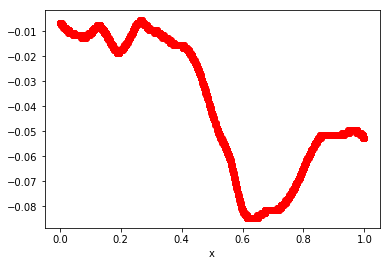

In [92]:
id = np.random.permutation(N)
perTrain = 0.7
NTr = int(round(N*perTrain))
idTr = id[:NTr]
idTe = id[NTr:]
xTr = x[idTr]
xTe = x[idTe]
GSRTr = GSR[idTr]
GSRTe = GSR[idTe]

plt.plot(xTr, GSRTr, 'or')
plt.xlabel('x')
GSRTr.shape

(1958L, 1L)

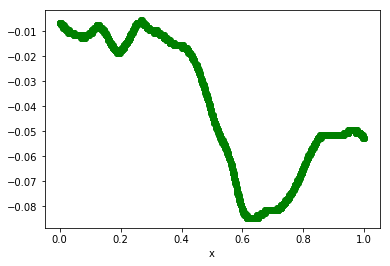

In [93]:
plt.plot(xTe, GSRTe, 'og')
plt.xlabel('x')
GSRTe.shape

## Funcion de regresión lineal y error

Luego de tener nuestros datos debidamente almacenados en sus respectivas variables debemos recordar que para una tarea de machine learning, nuestro conjunto de datos serán: 

$\bullet$  Observaciones para $\bf{X}=[\bf{x}_1,\bf{x}_2,\cdots, \bf{x}_N]\in \mathbb{R}^{N\times D}$, donde cada vector observado es de dimensionaledad $\bf{x}\in \mathbb{R}^{D\times 1}$

$\bullet$  Etiquetas (flotantes) para $\bf{t}\in \mathbb{R}^{N\times 1}$

In [94]:
def LS(X,t,basisFNC,NbF):
    Ndata,D = X.shape
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.linspace(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
    
    # Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst, s2  

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

Este módulo realiza la tarea de ajusta un conjunto de observaciones $\bf X$ a unas etiquetas $\bf t$ a partir de la selección del mapeo de una cantidad $M$ de funciones base que pueden ser de tipo polinomial, exponencial y sigmoidal. Estas funciones base permiten llevar nuestras observaciones a un espacio de representación mas relevante en el cual el ajuste de los datos presenta un mejor desempeño.

El módulo denominado $\bf LS$ se ejecuta de mediante el siguiente comando

$W\_ML, EtiquetaEstimada$ $=$ $\bf LS$$(observaciones,etiquetas,tipoFCNbase,M)$

Dicha función recibe cómo argumentos de entrada:

$\bullet$ observaciones: matriz de dimensión $\mathbb{R}^{N\times D}$ que contiene los patrones a modelar

$\bullet$ etiquetas: vector de dimensión $\mathbb{R}^{N\times 1}$ que contiene las etiquetas correspondientes a cada dato

$\bullet$ tipoFCNbase: dato tipo cadena para identificar el tipo de funcion base a utilizar. Esta cadena puede ser:

  $-$ 'pol': para una funcion de base polinomial
 
  $-$ 'exp': para una funcion de base exponencial
    
  $-$ 'sig': para una funcion de base sigmoidal
  
Dicha función tiene cómo argumentos de salida:

$\bullet$ $W\_ML$: vector de coeficientes que realiza la estimación de los datos de la forma $\hat{\bf{y}} = \bf{w}_{ML}^\top \phi(\bf{x}_n)$

$\bullet$ EtiquetaEstimada: vector de tamaño $\mathbb{R}^{N \times 1} $ que contiene las etiquetas estimadas para los respectivos $\bf X$

### Regresion con funciones bases polinomial

Hacemos la regresion lineal con bases polinomial, despues de un proceso empirico de buscar el mejor numero de funciones bases, se establece que con 10 es el que mas se acerca a la funcion GSR. Se calcula el Error del Train y del Test y se puede ver que con tiene un muy bajo porcentaje de error 

Error Test 0.00217745737874
Error Train 0.00220567294392


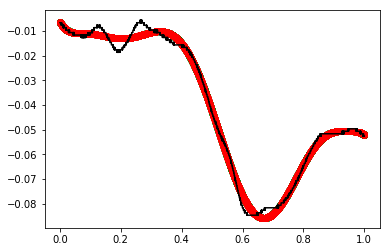

In [95]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'pol',10)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'pol', 10)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

### Regresion con funciones bases exponencial

Ahora analizaremos la función GSR, pero esta vez las funciones bases seran exponenciales. En esta ocasion la cantidad de funciones bases son menores pero tiene un aumento muy poco significativo en el error, casi imperceptible.

Error Test 0.00223247689652
Error Train 0.00225261342406


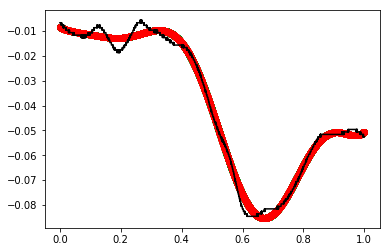

In [96]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'exp',9)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'exp',9)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

### Regresion con funciones bases sigmoidal

Ahora analizaremos la función GSR, pero esta vez las funciones bases seran sigmoidal y ocurre lo mismo, se reduje la cantidad de funciones bases, pero aumento el error, tambien muy poco significativo En conclusion, con este modelo de regresión lineal y para esta señal si se quiere menor error, viene siendo mejor trabajar con funciones bases polinomiales, pero si lo que se quiere es disminuir la complejidad computacional, lo mejor vendria siendo trabajar con funciones bases sigmoidal.

Error Test 0.0023249603656
Error Train 0.00233022929836


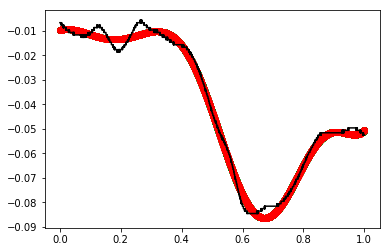

In [98]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,GSRTr,'sig',8)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,GSRTe,'sig',8)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

### Funcion de Regresion lineal con regularización y Error

Controlar el sobre entrenamiento.

In [99]:
def LS_Reg(X,t,basisFNC,NbF,lambdaI):
    Ndata,D = X.shape
    I = np.eye(NbF+1)
    #print Ndata,D
    yEst = np.zeros((Ndata,1))
    # Calculo de la matriz PHI de funciones base
    PHI = np.zeros((Ndata,NbF+1))
    PHI[:,0] = 1
    mu = np.linspace(0.0, 1.0, NbF+1)
    s2 = np.var(mu)
    for n in range(0,Ndata):
        #print X[n]
        for i in range(1,NbF+1):
            if basisFNC == 'pol':                
                PHI[n][i] = X[n]**(i)
            if basisFNC == 'exp':
                PHI[n][i] = math.exp(-((X[n]-mu[i])**2)/(2*s2))
            if basisFNC == 'sig':
                PHI[n][i] = (1 / (1 + np.exp(-((X[n]-mu[i])/math.sqrt(s2)))))
# Luego se estima el mejor W que maximiza la verosimilitud utilizando minimos cuadrados
    PHIT = PHI.T
    w_ml = np.linalg.inv(lambdaI*I+PHIT.dot(PHI)).dot(PHIT.dot(t))
    yEst = PHI.dot(w_ml)
    #print w_ml
    return PHI,w_ml,yEst

def Erms(to, te):
    N, d = to.shape
    eRMS = np.sqrt((1.0/N)*np.sum((to-te)**2))
    return eRMS

### Regresion con regularización con funciones bases polinomial

A la hora de hacer la regresion con regularizacion con funciones bases polinomiales, se logra disminuir el error pero de una manera muy poco visible, pero se logra que cuando se aumentan las funciones bases, no se sobreentrena como pasa en la regresion lineal normal.

Error Test 0.00201963970691
Error Train 0.00206398000891


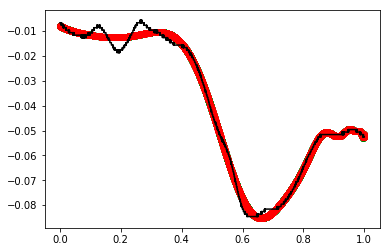

In [45]:

lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'pol',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'pol',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

### Regresión con regularización con funciones exponenciales

A la hora de hacerlo con funciones bases exponenciales, sigue existiendo el mismo que con la regresión lineal normal. Pero se puede observar que tambien disminuyo el error. 

Error Test 0.00219172545771
Error Train 0.00222050037506


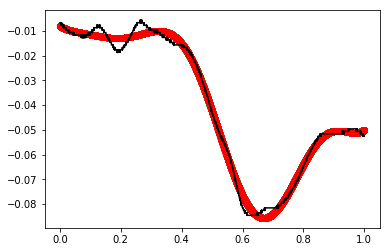

In [46]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'exp',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'exp',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

### Regresión con regularización con funciones sigmoidales

Lo mismo resulta con las funcionses sigmoidales, se puede apreciar que se noto una gran mejoria a la hora de hacer la regresión con regularizacion a la hora de hacer el Train, pero cuando se testea, la función resultante no es nada parecida a lo que necesitamos.

Error Test 0.00230885183662
Error Train 0.00231868687268


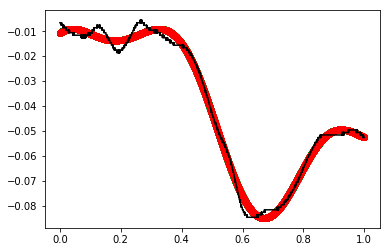

In [47]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,GSRTr,'sig',100, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,GSRTe,'sig',100, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,GSR, '-k')

RMStest = Erms(GSRTr, yEstimadoTr)
RMStrain = Erms(GSRTe, yEstimadoTe)

print "Error Test", RMStest
print "Error Train", RMStrain

Entre trabajar con regresion lineal y regresion lineal con regularización, a la hora de buscar menor error, conviene trabajar con funciones bases polinomial, por lo expuesto y verificado con el error.

## Regresion Bayesiana

### Regresión bayesiana con funciones base polinomial

A la hora de analizar nuestra señal GSR con la regresion bayesiana, tenemos que tener tambien una matriz de funciones bases, en este caso lo haremos con funciones bases polinomiales, despues de varias el alpha y beta, no se pudo llegar a un ajuste como en la regresion lineal y regresion lineal con regularización.

(4570L, 100L)
(100L, 1L) (100L, 100L)
Error Train (0.421399958394-0.047961173585j)


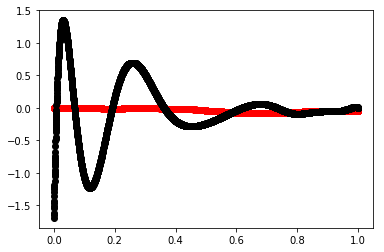

In [48]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'pol',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.0
beta = 0.1
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')


RMStrain = Erms(GSRTr, yEstfin)
print "Error Train", RMStrain


### Regresión bayesiana con funciones base exponencial

Con regresion bayesiana con funciones base exponencial, las cosas mejoraron drasticamente comparandola con la regresion lineal. Con estas funciones bases, son las que mas se ajusta a la señal en comparación con las demas funciones bases, y esto se puede apreciar en las graficas.

(4570L, 100L)
(100L, 1L) (100L, 100L)
Error Train (0.00181580856903-0.0666464298731j)


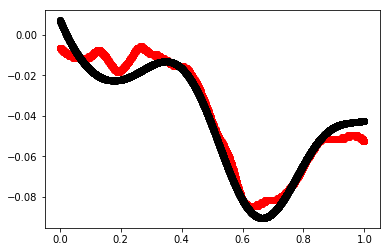

In [63]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'exp',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.35
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')

RMStrain = Erms(GSRTr, yEstfin)
print "Error Train", RMStrain


### Regresión bayesiana con funciones base sigmoidal

Con regresion bayesiana con funciones base sigmoidales, se ve mejorado tambien como con la exponencial en comparativa con la regresion lineal. Se ajusta a la señal pero hay mucha diferencia con la misma.

(4570L, 100L)
(100L, 1L) (100L, 100L)
Error Train (0.000257224608105+0.0135230068751j)


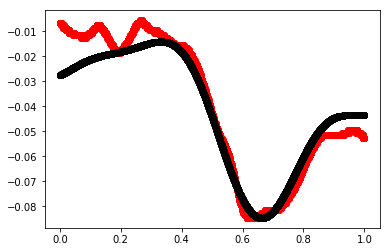

In [66]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,GSRTr,'sig',M-1)
print PHI.shape

iT = 100 # Numero de iteraciones
alpha = 0.5
beta = 0.55
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(GSRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((GSRTr-PHI.dot(mn)).T).dot(GSRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(GSRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,GSRTr,'or')
plt.plot(xTr,yEstfin,'ok')

RMStrain = Erms(GSRTr, yEstfin)
print "Error Train", RMStrain

El mayor problema que se logra percibir en este modelo es el ajuste del alpha y beta, ya que toca hacerlo empiricamente, prueba tras prueba ajustarlo y es un trabajo bastante arduo y dificil de hacer.

## Analizando HR

Ahora continuaremos analizando la señal HR, se sigue partiendo la señal en dos partes, una para entrenar nuestro modelo y la otra para verificar, estas partes se dividiran en 70% para entrenamiento y 30% para test como lo anteriormente visto. Pero se puede ver que esta señal varia mas que la anteriormente analizad

- xTr = Representa el conjunto de las caracteristicas de entrenamiento
- xTe = Representa el conjunto de las caracteristicas de testing
- HRTr = Representa los datos recogidos de la respuesta galvanica de la piel para el entrenamiento
- HRTe = Representa los datos recogidos de la respuesta galvanica de la piel para el testing

Graficamos los datos de entramiento y los de testing.

(4570L, 1L)

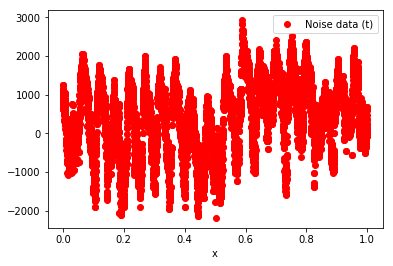

In [100]:
plt.plot(x,HR,'or')
plt.xlabel('x')
plt.legend(('Noise data (t)', 'True data (y)'))

id = np.random.permutation(N)
perTrain = 0.7
NTr = int(round(N*perTrain))
idTr = id[:NTr]
idTe = id[NTr:]
xTr = x[idTr]
xTe = x[idTe]
HRTr = HR[idTr]
HRTe = HR[idTe]

plt.plot(xTr, HRTr, 'or')
plt.xlabel('x')
HRTr.shape

(1958L, 1L)

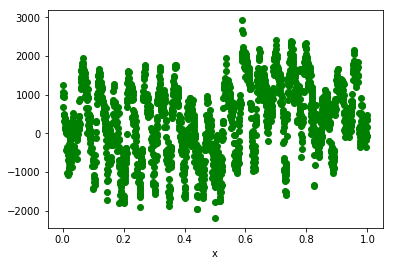

In [101]:
plt.plot(xTe, HRTe, 'og')
plt.xlabel('x')
HRTe.shape

## Regresion con funciones bases polinomial

Volviendo a la regresion con funciones bases polinomial, pero hay mucho error en nuestro modelo, pero se ajusta un poco a la señal, como en una media entre las subidas y bajadas de la señal

907.059644735 915.448400269


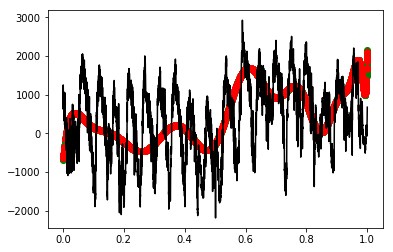

In [102]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,HRTr,'pol', 30)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,HRTe,'pol', 30)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresion con funciones bases exponencial

Con regresion lineal con funciones bases exponencial, por mas que se subio la cantidad de funciones bases, no se logró modelar la señal, dicha señal por ser tan variable en intervalos cortos es dificil de ajustar con este tipo de modelo.

962.691993987 980.348295665


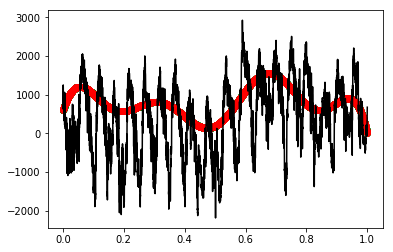

In [103]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,HRTr,'exp',50)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,HRTe,'exp',50)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresion con funciones bases sigmoidal

Con regresion lineal con funciones bases sigmoidal, esto no cambia con respecto al analisis hecho con funciones bases exponenciales. Es muy dificil al tener cambios tan brucos.

845.604955454 848.185668299


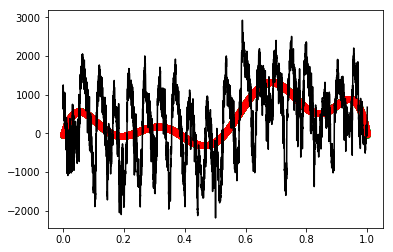

In [104]:
PHIbTr,w_ML,yEstimadoTr, s2 = LS(xTr,HRTr,'sig',51)
PHIbTe,w_MLTe,yEstimadoTe, s2 = LS(xTe,HRTe,'sig', 51)
yEstimadoTe = PHIbTe.dot(w_ML)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

### Regresion con regularización con funciones bases polinomial

Con regresion lineal con regularización, como nuestra señal HR tiene unos cambios tan bruscos, con las funciones bases polinomial no logra describirla a un alto grado de eficiencia. No logra modelar los cambios tan fuertes vistos en la señal.

820.086505166 823.586269905


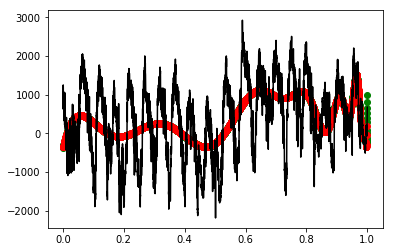

In [81]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,HRTr,'pol',150, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,HRTe,'pol',150, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

## Regresión con regularización con funciones exponenciales

Con funciones exponenciales tiene un mayor error que que con funciones bases polinomiales, igual es muy dificil con este modelo modelar dicha funcion por lo anteriormente expuesto.

843.091378935 848.138692979


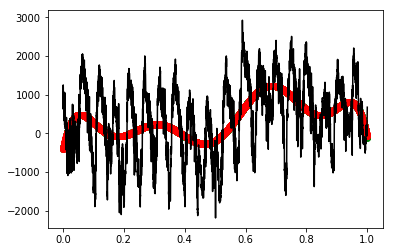

In [82]:
lambdaI = math.exp(-18.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,HRTr,'exp',150, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,HRTe,'exp',150, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

## Regresión con regularización con funciones sigmoidales

Pero de las tres pruebas esta es la que mas contiene error, ya que la funcion sigmoidal, es la funcion mas suave a la hora de la curvatura, y dicha señal que tenemos tiene cambios muy bruscos en pequeños intervalos.

882.677678139 895.257023375


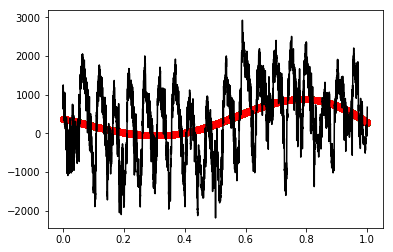

In [83]:
lambdaI = math.exp(-2.0)
PHIbTr,w_MLReg,yEstimadoTr = LS_Reg(xTr,HRTr,'sig',150, lambdaI)
PHIbTe,w_MLRegTe,yEstimadoTe = LS_Reg(xTe,HRTe,'sig',150, lambdaI)
yEstimadoTe = PHIbTe.dot(w_MLReg)
plt.plot(xTr,yEstimadoTr, 'og')
plt.plot(xTe,yEstimadoTe, 'or')
plt.plot(x,HR, '-k')

RMStest = Erms(HRTr, yEstimadoTr)
RMStrain = Erms(HRTe, yEstimadoTe)

print RMStest, RMStrain

## Regresión bayesiana con funciones base polinomial

Con regresion bayesiana y funciones bases polinomiales, nuestro modelo no logra describir la funcion HR a la perfeccion, el modelo tiene un alto grado de error. Como se puede observar en la grafica siguiente.

(4570L, 100L)
(100L, 1L) (100L, 100L)


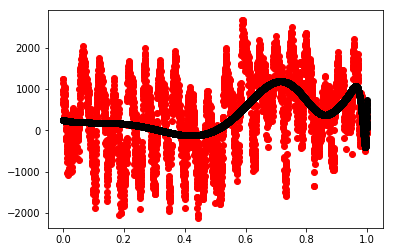

In [84]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,HRTr,'pol',M-1)
print PHI.shape

iT = 200 # Numero de iteraciones
alpha = 0.1
beta = 1.0
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(HRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((HRTr-PHI.dot(mn)).T).dot(HRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(HRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,HRTr,'or')
plt.plot(xTr,yEstfin,'ok')

## Regresión bayesiana con funciones base exponencial

Con regresion bayesiana con funciones base exponencial, se ajusta mas a nuestra funcion HR pero como la misma es tan variable, no se logra modelar con un alto grado de acierto.

(4570L, 100L)
(100L, 1L) (100L, 100L)


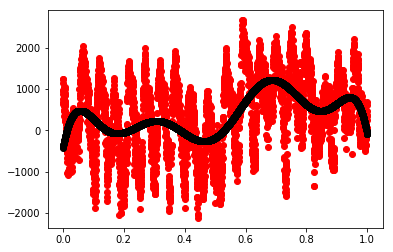

In [85]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,HRTr,'exp',M-1)
print PHI.shape

iT = 200 # Numero de iteraciones
alpha = 0.8
beta = 2.7
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(HRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((HRTr-PHI.dot(mn)).T).dot(HRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(HRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,HRTr,'or')
plt.plot(xTr,yEstfin,'ok')

## Regresión bayesiana con funciones base sigmoidal

Y con funciones base sigmoidal, lo mismo ocurre que con exponencial. Esta funcion es muy dificil describirla con este tipo de regresion al ser tan variables en un intervalo tan pequeño.

(4570L, 100L)
(100L, 1L) (100L, 100L)


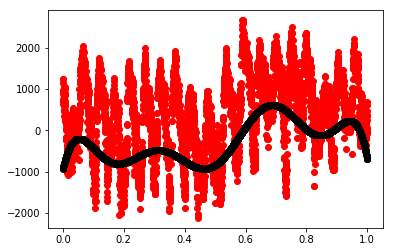

In [88]:
M = 100 # numero de funciones base
PHI,w_MLReg,yEstimadoTr, s2 = LS(xTr,HRTr,'sig',M-1)
print PHI.shape

iT = 200 # Numero de iteraciones
alpha = 0.2
beta = 0.5
invbeta = 1/beta
PHIT = PHI.T
invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
Sn = np.linalg.inv(invSn)
mn = beta*Sn.dot(PHIT.dot(HRTr))
print mn.shape,Sn.shape

# Probemos la estimacion con el mn inicial
yEst = PHI.dot(mn)
lambdaIp,vecI = np.linalg.eig(PHIT.dot(PHI))
lambdaI = beta*lambdaIp
for j in range(0,iT):
    gamma = np.sum(lambdaI/(alpha*np.ones(lambdaI.shape)+lambdaI))
    alpha = gamma/((mn.T).dot(mn))
    invbeta = (1/(N-gamma))*(((HRTr-PHI.dot(mn)).T).dot(HRTr-PHI.dot(mn)))
    beta = 1/invbeta
    lambdaI = beta*lambdaIp
    invSn = alpha*np.eye(M)+ beta*PHIT.dot(PHI)
    Sn = np.linalg.inv(invSn)
    mn = beta*Sn.dot(PHIT.dot(HRTr))
    
#print invSn 
yEstfin = PHI.dot(mn)
plt.plot(xTr,HRTr,'or')
plt.plot(xTr,yEstfin,'ok')

En conclusion, este tipos de señales queda muy dificil describirla con este tipo de modelos y funciones bases, por mas que se probo subir o bajar la cantidad de funciones bases y cambiar el alpha y beta, no se logra al menos tener un modelo aceptable.